![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [74]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [75]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [76]:
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [77]:
penguins_df = pd.get_dummies(penguins_df, columns=['sex'], drop_first=True)
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


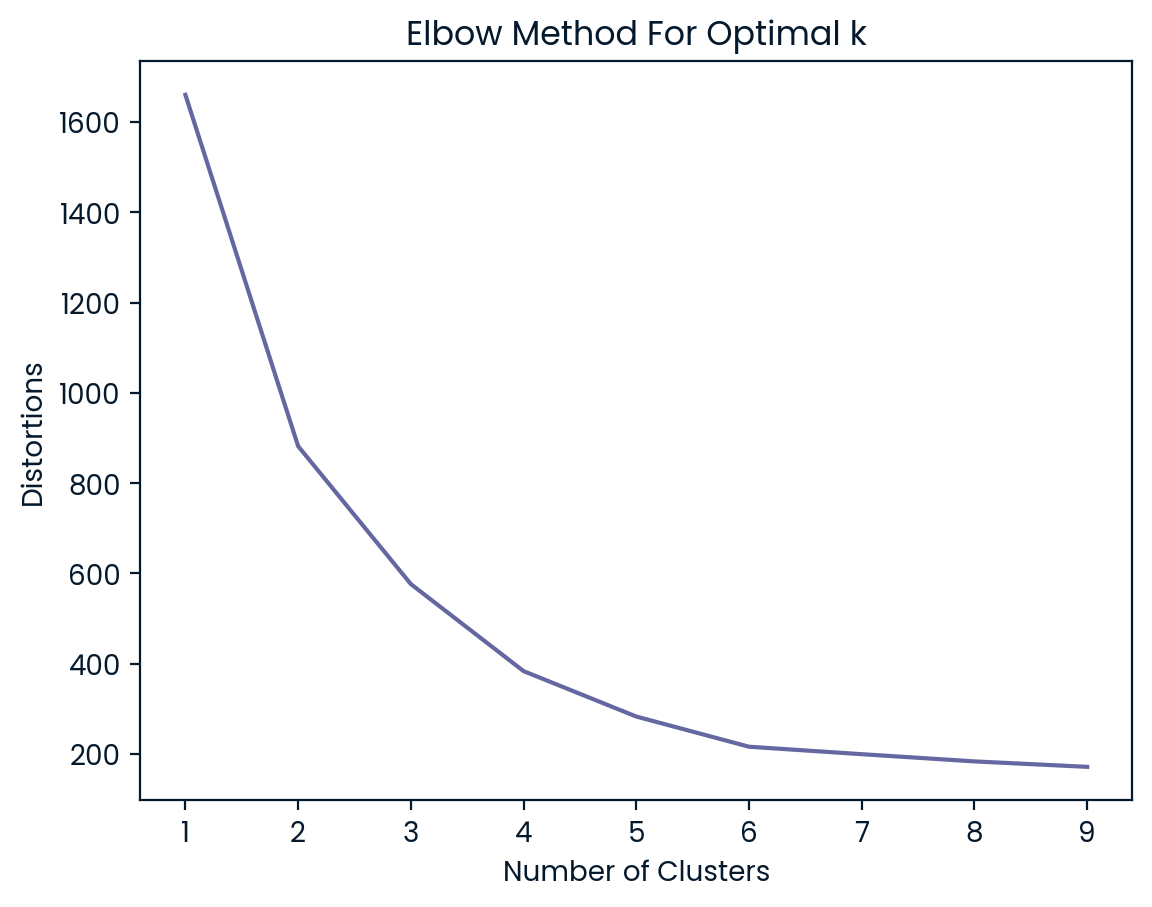

In [78]:
scaler = StandardScaler()
penguins_df_scaled = scaler.fit_transform(penguins_df)

inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(penguins_df_scaled)
    inertia.append(kmeans.inertia_)

# Prepare data for plotting
penguins_df_plot = {'num_clusters': range(1, 10), 'distortions': inertia}

plt.plot(penguins_df_plot['num_clusters'], penguins_df_plot['distortions'])
plt.xlabel('Number of Clusters')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.show()

In [79]:
scaler.fit(penguins_df)
StandardScaler(copy=True ,with_mean=True ,with_std=True)
penguins_df_Scaled=scaler.transform(penguins_df)

In [80]:
model = KMeans(n_clusters=5)
model.fit(penguins_df_Scaled)
predicted_penguins = model.predict(penguins_df_Scaled)

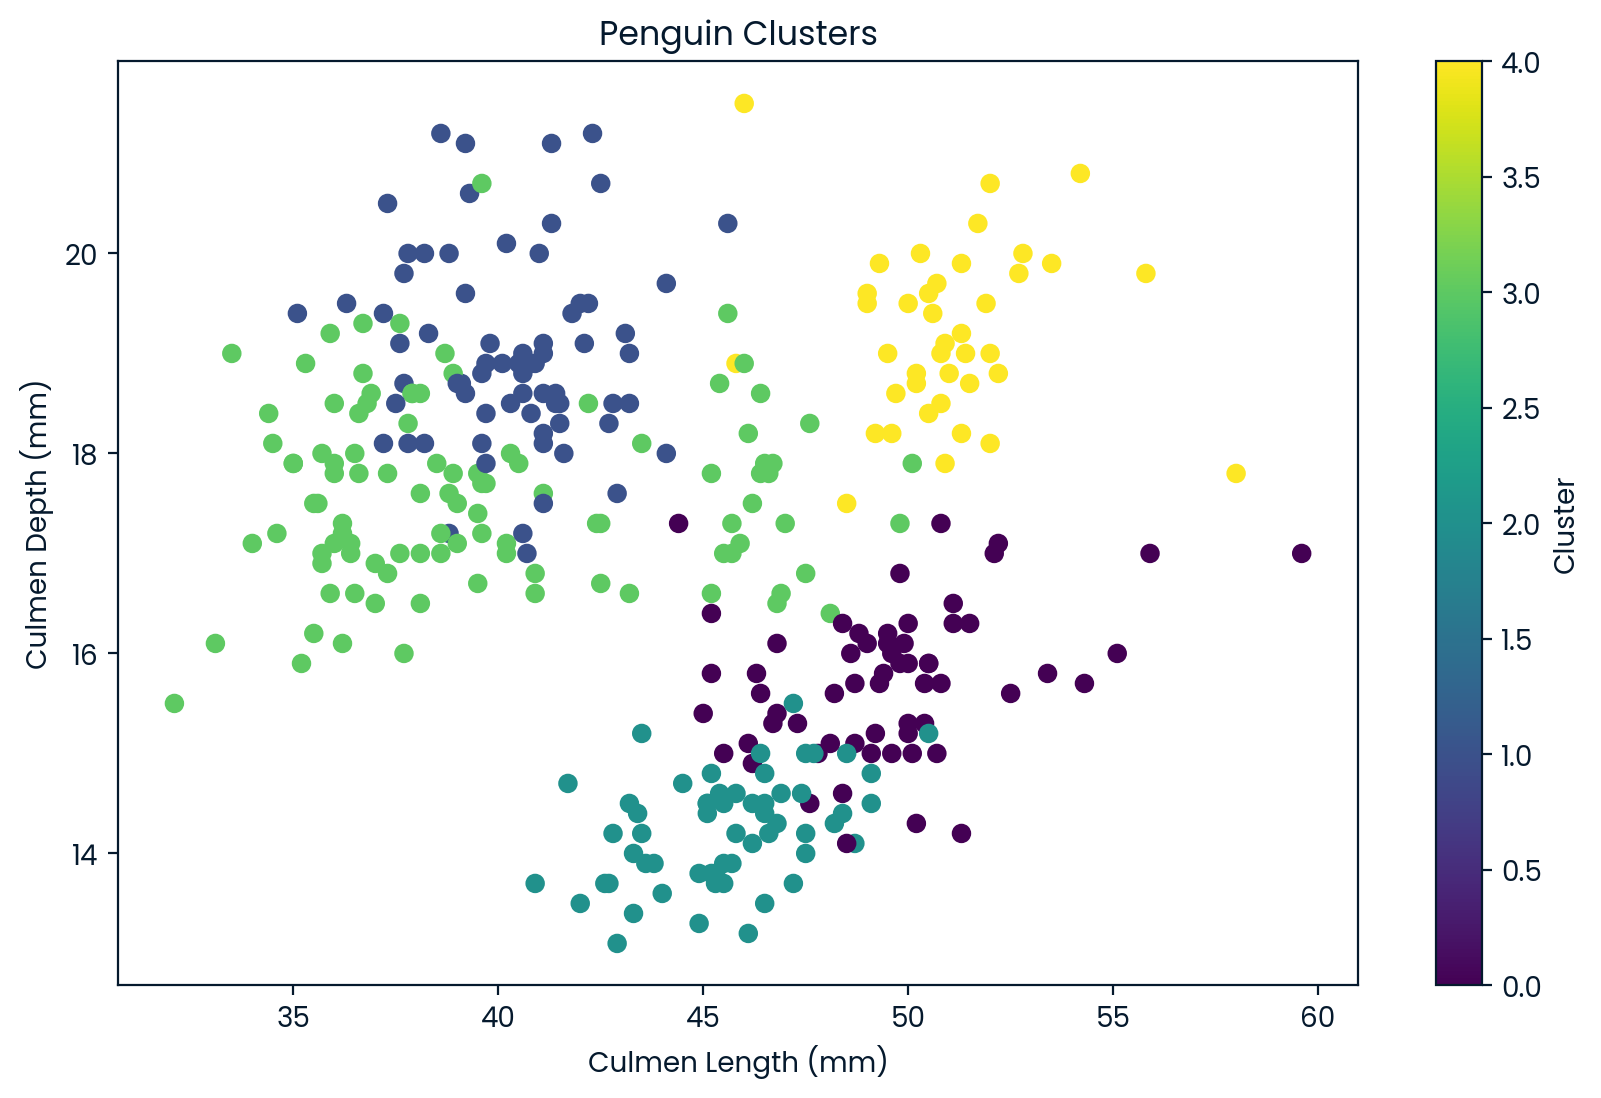

In [81]:
penguins_df['cluster'] = predicted_penguins
plt.figure(figsize=(10, 6))
plt.scatter(penguins_df['culmen_length_mm'], penguins_df['culmen_depth_mm'], c=penguins_df['cluster'], cmap='viridis', marker='o')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Penguin Clusters')
plt.colorbar(label='Cluster')
plt.show()

In [82]:
stat_penguins = penguins_df.groupby('cluster').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
cluster,,,,,
0,49.473770,15.718033,221.540984,5484.836066,1.0
1,40.315714,19.011429,192.242857,4034.642857,1.0
2,45.563793,14.237931,212.706897,4679.741379,0.0
3,39.744660,17.588350,188.864078,3410.679612,0.0
4,50.965000,19.195000,199.075000,3920.625000,0.9
